# **Import required libraries**

In [48]:
# import the libraries as shown below
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np

In [16]:
img_size = [64,64,3]

In [14]:
test = '/content/drive/MyDrive/datasets/cat_dog_dataset/test_set/test_set'                         
train = '/content/drive/MyDrive/datasets/cat_dog_dataset/training_set/training_set'

# **Data** **Augmentation**

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory(test,
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [21]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

# **Define a model**

In [22]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, input_shape=[64, 64, 3]))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=128, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))     

model1.add(Conv2D(filters=256, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.5))                                                                        
model1.add(Flatten()) # neural network beulding
model1.add(Dense(units=128, activation='relu')) # input layers
model1.add(Dropout(0.1))                                    
model1.add(Dense(units=256, activation='relu'))                                    
model1.add(Dropout(0.25))             
model1.add(Dense(units=2, activation='softmax')) # output layer

In [23]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# **Train a model**

In [24]:
history1 = model1.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
501/501 [==============================] - 76s 87ms/step - loss: 0.6995 - accuracy: 0.5348 - val_loss: 0.6247 - val_accuracy: 0.6673
Epoch 2/25
501/501 [==============================] - 43s 86ms/step - loss: 0.6382 - accuracy: 0.6447 - val_loss: 0.5802 - val_accuracy: 0.7029
Epoch 3/25
501/501 [==============================] - 43s 85ms/step - loss: 0.5712 - accuracy: 0.7166 - val_loss: 0.5947 - val_accuracy: 0.6831
Epoch 4/25
501/501 [==============================] - 44s 88ms/step - loss: 0.5580 - accuracy: 0.7194 - val_loss: 0.5107 - val_accuracy: 0.7553
Epoch 5/25
501/501 [==============================] - 43s 86ms/step - loss: 0.5315 - accuracy: 0.7322 - val_loss: 0.5235 - val_accuracy: 0.7642
Epoch 6/25
501/501 [==============================] - 44s 87ms/step - loss: 0.5053 - accuracy: 0.7568 - val_loss: 0.4998 - val_accuracy: 0.7805
Epoch 7/25
501/501 [==============================] - 44s 87ms/step - loss: 0.4831 - accuracy: 0.7683 - val_loss: 0.4778 - val_accuracy:

# **Save a model**

In [26]:
# save it as a h5 file
model1.save('Cat_Dog_classifier.h5')   # Dog:1 , Cat:0

# **Load a model**

In [39]:
model =load_model("Cat_Dog_classifier.h5")

# **Test a image that model is working correctly or not**

In [45]:
# img_path = "/content/drive/MyDrive/datasets/cat_dog_dataset/Test_imgs/1.jpeg"
img_path = "/content/drive/MyDrive/datasets/cat_dog_dataset/Test_imgs/5.jpg"

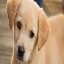

In [46]:
img=image.load_img(img_path,target_size=(64,64))
img

In [47]:
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x)[0], axis=-1)

if pred==1:
  print('DOG')
else:
  print("CAT")


DOG
